In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

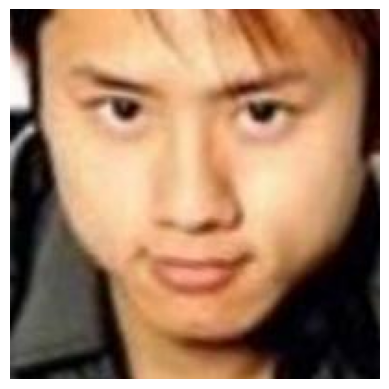

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import cv2

# Kép beolvasása
image_path = "/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV BGR-t használ, ezért RGB-re kell konvertálni

# Kép megjelenítése
plt.imshow(image)
plt.axis("off")
plt.show()


In [2]:
image_folder = "/kaggle/input/utkface-new/UTKFace/"

# Összes kép beolvasása
image_paths = glob.glob(os.path.join(image_folder, "*.jpg"))

# Adatok tárolása
data = []

# Fájlnevekből: age_gender_race_date.jpg
for image_path in image_paths:
    filename = os.path.basename(image_path)
    parts = filename.split("_")
    if len(parts) >= 4:
        try:
            age = int(parts[0])
            gender = int(parts[1])
            race = int(parts[2])
            data.append((age, gender, race))
        except ValueError:
            continue

# DataFrame létrehozása
df = pd.DataFrame(data, columns=["Age", "Gender", "Race"])

print(df.head())

   Age  Gender  Race
0   26       0     2
1   22       1     1
2   21       1     3
3   28       0     0
4   17       1     4


In [3]:
# Életkor statisztikái

ages = df['Age']

# Átlag
mean_value = np.mean(ages)

# Medián
median_value = statistics.median(ages)

# Módusz
mode_value = statistics.mode(ages)

# Kvartilisok
q1 = np.percentile(ages, 25)
q3 = np.percentile(ages, 75)

print(f"Átlag: {mean_value}")
print(f"Medián: {median_value}")
print(f"Módusz: {mode_value}")
print(f"Első kvartilis (Q1): {q1}")
print(f"Harmadik kvartilis (Q3): {q3}")


Átlag: 33.30090698164944
Medián: 29
Módusz: 26
Első kvartilis (Q1): 23.0
Harmadik kvartilis (Q3): 45.0


Text(0, 0.5, 'Személyek száma')

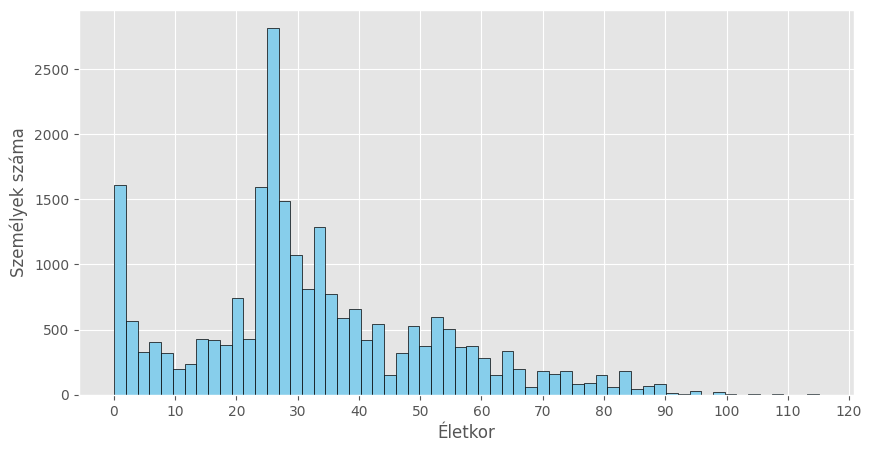

In [4]:
# Hisztogram az életkor eloszlásáról

plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.hist(ages, bins=60, color="skyblue", edgecolor="black", align='left')
plt.xlabel("Életkor")
plt.xticks(range(0, 121, 10))
plt.ylabel("Személyek száma")

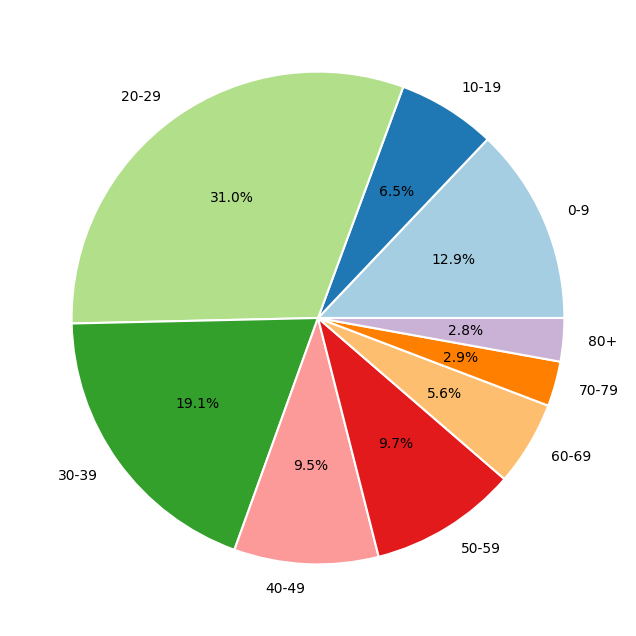

In [5]:
# Kördiagram az életkor eloszlásáról

# Kategóriák létrehozása
bins = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
counts = [0] * len(bins)

# Életkorok csoportosítása
for age in ages:
    if age < 10:
        counts[0] += 1
    elif age < 20:
        counts[1] += 1
    elif age < 30:
        counts[2] += 1
    elif age < 40:
        counts[3] += 1
    elif age < 50:
        counts[4] += 1
    elif age < 60:
        counts[5] += 1
    elif age < 70:
        counts[6] += 1
    elif age < 80:
        counts[7] += 1
    else:
        counts[8] += 1



# Kördiagram megrajzolása
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=bins, autopct="%1.1f%%", wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, colors=plt.cm.Paired.colors)
plt.show()


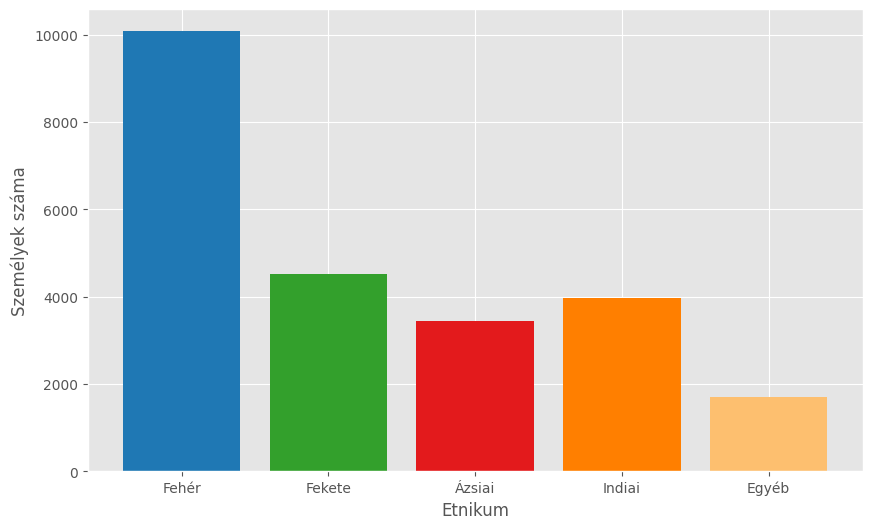

In [6]:
# Oszlopdiagram az etnikumok eloszlásáról

race_labels = ["Fehér", "Fekete", "Ázsiai", "Indiai", "Egyéb"]

# Etnikumok eloszlásának ábrázolása
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")
custom_colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#fdbf6f"] 
plt.bar(race_labels, df["Race"].value_counts().sort_index(), color=custom_colors)
plt.xlabel("Etnikum")
plt.ylabel("Személyek száma")
plt.show()


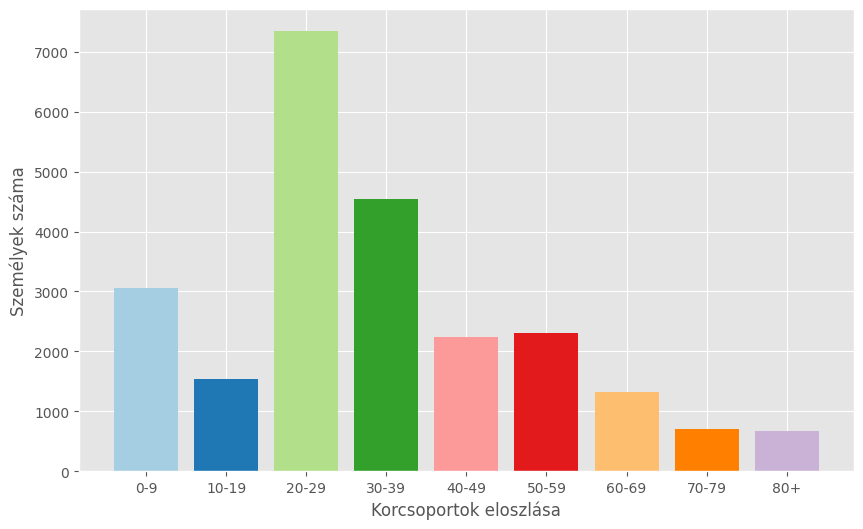

In [7]:
# Oszlopdiagram a korcsoportok eloszlásáról

# Kategóriák létrehozása
bins = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
counts = [0] * len(bins)

# Életkorok csoportosítása
for age in ages:
    if age < 10:
        counts[0] += 1
    elif age < 20:
        counts[1] += 1
    elif age < 30:
        counts[2] += 1
    elif age < 40:
        counts[3] += 1
    elif age < 50:
        counts[4] += 1
    elif age < 60:
        counts[5] += 1
    elif age < 70:
        counts[6] += 1
    elif age < 80:
        counts[7] += 1
    else:
        counts[8] += 1

# Plot kirajzolása
pie_colors = plt.cm.Paired.colors
plt.figure(figsize=(10, 6))
plt.bar(bins, counts, color=pie_colors[:len(bins)])
plt.xlabel("Korcsoportok eloszlása")
plt.ylabel("Személyek száma")
plt.show()


In [8]:
# Nemek arányának kiszámítása
gender_counts = df['Gender'].value_counts()
total = gender_counts.sum()

gender_percentages = (gender_counts / total * 100).round(2)

gender_translation = {
    0: "Férfi",
    1: "Nő"
}

for gender in gender_percentages.index:
    print(f"{gender_translation[gender]}: {gender_percentages[gender]}%")


Férfi: 52.27%
Nő: 47.73%
